In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



white_wine=pd.read_csv('Wine Quality/winequality-white.csv')
white_wine = pd.read_csv('Wine Quality/winequality-white.csv',sep=';')
white_wine['quality_label'] = white_wine['quality'].apply(lambda x: 1
if x <= 5 else 2
if x <= 7 else 3)

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],categories=[1, 2,3])

X = white_wine
y = white_wine['quality_label']
X.drop(['quality_label','quality'],axis=1,inplace=True)
print(y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


0       2
1       2
2       2
3       2
4       2
       ..
4893    2
4894    1
4895    2
4896    2
4897    2
Name: quality_label, Length: 4898, dtype: category
Categories (3, int64): [1, 2, 3]


In [7]:
clf = RandomForestClassifier(max_depth=5,random_state=0)
clf.fit(X_train,y_train)
pred_random = clf.predict(X_test)
pred_random2 = clf.predict(X_train)

for plotting graph of train

Feature: 0, Score: 0.06944
Feature: 1, Score: 0.11480
Feature: 2, Score: 0.08033
Feature: 3, Score: 0.08481
Feature: 4, Score: 0.08404
Feature: 5, Score: 0.09949
Feature: 6, Score: 0.08797
Feature: 7, Score: 0.10330
Feature: 8, Score: 0.07592
Feature: 9, Score: 0.06981
Feature: 10, Score: 0.13009


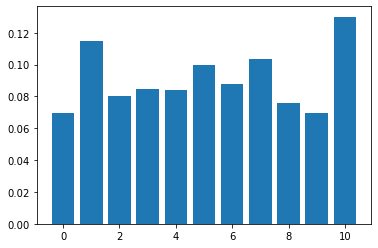

In [8]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot


# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<AxesSubplot:title={'center':'Machine Learning Models Accuracy'}>

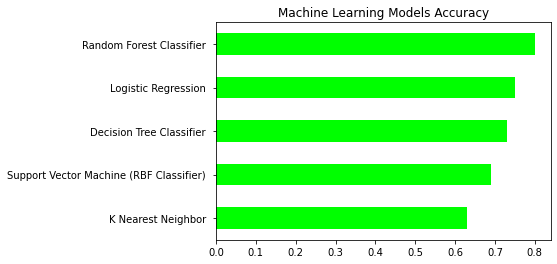

In [6]:
d = {'Logistic Regression ': [0.75],'K Nearest Neighbor ': [ 0.63],
'Support Vector Machine (RBF Classifier) ': [0.69],
'Decision Tree Classifier ': [0.73], 'Random Forest Classifier ': [0.80]}
df = pd.DataFrame(data=d)
df=df.T


df.sort_values(0,ascending=True,inplace=True)
df.plot.barh(color= '#00ff00',title='Machine Learning Models Accuracy', legend=None)


In [9]:
#importing module
from sklearn.preprocessing import MinMaxScaler
# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(X_train)
new_xtrain = norm_fit.transform(X_train)
new_xtest = norm_fit.transform(X_test)
# display values
print(new_xtrain)

[[0.425      0.17647059 0.19277108 ... 0.45794393 0.31395349 0.40322581]
 [0.2        0.20588235 0.22891566 ... 0.5046729  0.1627907  0.70967742]
 [0.3375     0.37254902 0.18674699 ... 0.48598131 0.44186047 0.56451613]
 ...
 [0.5125     0.24509804 0.1686747  ... 0.38317757 0.18604651 0.12903226]
 [0.6375     0.17647059 0.19879518 ... 0.36448598 0.27906977 0.4516129 ]
 [0.5125     0.42156863 0.20481928 ... 0.3271028  0.3372093  0.32258065]]


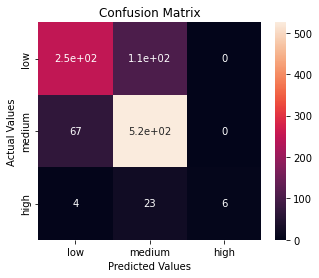

Accuracy score: 0.7959183673469388
              precision    recall  f1-score   support

         low       0.78      0.70      0.74       355
      medium       0.80      0.89      0.84       592
        high       1.00      0.18      0.31        33

    accuracy                           0.80       980
   macro avg       0.86      0.59      0.63       980
weighted avg       0.80      0.80      0.79       980

Cohen-Kappa score: 0.5733881253890656


In [10]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_RF))
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred_RF))

[[249 106   0]
 [ 67 525   0]
 [  4  23   6]]
0.7959183673469388


Feature: 0, Score: 0.07047
Feature: 1, Score: 0.11087
Feature: 2, Score: 0.08041
Feature: 3, Score: 0.08578
Feature: 4, Score: 0.08253
Feature: 5, Score: 0.09872
Feature: 6, Score: 0.08643
Feature: 7, Score: 0.10862
Feature: 8, Score: 0.07664
Feature: 9, Score: 0.07158
Feature: 10, Score: 0.12794


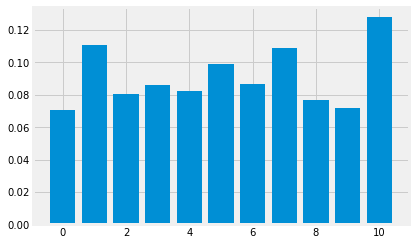

In [33]:
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800; total time=   5.2s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   7.8s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   7.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=   8.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_e

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [17]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [18]:
from sklearn import metrics

def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print (accuracy)
    print(confusion_matrix(y_test,y_pred))
    

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

0.7928571428571428
[[233 122   0]
 [ 53 537   2]
 [  1  25   7]]


In [34]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [1150, 1200, 1250, 1300,1350]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1150; total time=   4.9s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1250; total time=   5.0s
[CV] END bootstrap=True, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1200; total time=   5.1s

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [1150, 1200, 1250, 1300, 1350]},
             verbose=2)

In [33]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [21]:
best_grid = grid_search.best_estimator_
evaluate(best_grid,X_test,y_test)

0.7714285714285715
[[214 141   0]
 [ 50 542   0]
 [  0  33   0]]


In [22]:
# Build the k-fold cross-validator
kfold = KFold(n_splits=10, random_state=None)

result = cross_val_score(forest, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.704592880096824


Random decision trees or random forest are an ensemble learning method for classification, regression, etc. It operates by constructing a multitude of decision trees at training time and outputs the class that is the mode of the classes or classification or mean prediction(regression) of the individual trees.

A random forest is a meta-estimator that fits a number of trees on various subsamples of data sets and then uses an average to improve the accuracy in the model’s predictive nature. The sub-sample size is always the same as that of the original input size but the samples are often drawn with replacements.

Advantages and Disadvantages

The advantage of the random forest is that it is more accurate than the decision trees due to the reduction in the over-fitting. The only disadvantage with the random forest classifiers is that it is quite complex in implementation and gets pretty slow in real-time prediction.

In [23]:


X.drop(['pH','sulphates','total sulfur dioxide','citric acid','residual sugar','fixed acidity'],axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

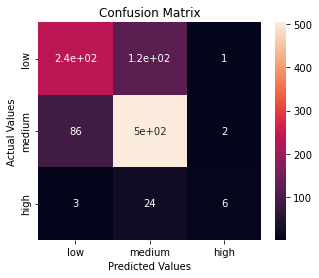

Accuracy score: 0.7602040816326531
              precision    recall  f1-score   support

         low       0.73      0.66      0.69       355
      medium       0.78      0.85      0.81       592
        high       0.67      0.18      0.29        33

    accuracy                           0.76       980
   macro avg       0.72      0.57      0.60       980
weighted avg       0.76      0.76      0.75       980

Cohen-Kappa score: 0.5015788027070136


In [25]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
pred_RF=forest.predict(X_test)
cm = confusion_matrix(y_test, pred_RF)
cm_df = pd.DataFrame(cm,
                     index = ["low","medium","high"], 
                     columns = ["low","medium","high"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy score:", accuracy_score(y_test, pred_RF))
print(classification_report(y_test, pred_RF, target_names=["low","medium","high"]))

kappa = cohen_kappa_score(pred_RF, y_test)
print("Cohen-Kappa score:", kappa)